In [37]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
import os 
os.getcwd()

os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [68]:
data = pd.read_excel("HW_Data_Set.xlsx")

In [69]:
data1 = data.copy()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


ÖDEV AMACI; PCA ile boyut düşürmek olduğu için object değişkenlerimden ind_422 'ye dummy yapacağım.
Diğer 2 object değişken olarak gözüken değişkenlerimi ise yanlış etiketlendiği gerekçesi ile integer ' a dönüştüreceğim ve ya direk drop edeceğim.
Bu çalışmada direk droplamayı tercih ediyorum.

In [71]:
data.head(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [72]:
cat_data = data.select_dtypes(include = ["object"])
cat_data.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [73]:
cdata = data.copy()

In [74]:
cdata.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805


In [75]:
col = ['ind_420', 'ind_422']
cdata.drop(col, inplace=True,axis = 1)
cdata.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805


PCA yapacağım için kategorik değişkenim olan ind_109'u dummy yaptım.

In [76]:
cat = pd.get_dummies(cdata[['ind_109']])

In [77]:
cat.head(3)

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0


hedef değişkenimi 90_target belirledim dolayısıyla object değişkenimden sonra kullanmayacağım hedefler 20_target ve 50_target'ı çıkarıyorum

In [78]:
col1 = ['20_target', '50_target']
cdata.drop(col1,inplace=True,axis =1 )
cdata.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,-37.024805


In [79]:
y = cdata["90_target"] # hedef değişkenim

X_ = cdata.drop(["90_target","ind_109"], axis = 1).astype("float64")
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522


In [80]:
# kontrol

cat_data1 = X_.select_dtypes(include = ["object"])
cat_data1

# Kategorik değişkeni başarılı bir  şekilde veri setinden kaldırdık.

""
0
1
2
3
4
5
6
7
8
9


In [81]:
# dummy değişken hale getirdiğimiz değişkenler ile birleştirme

X = pd.concat([X_, cat[["ind_109_GREEN"	,"ind_109_RED"]]], axis = 1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN,ind_109_RED
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,1,0
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,1,0
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,1,0
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,1,0
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,1,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = data.copy()

print("training", training.shape)

X_train (5241, 132)
y_train (5241,)
X_test (926, 132)
y_test (926,)
training (6167, 136)


In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [84]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [85]:
X_reduced_train[0:1,:] # tüm bileşenler

array([[-1.04598054e+01, -1.21441275e+00,  1.41936839e+00,
        -2.11934032e+00, -1.38337157e+00, -5.17898054e-01,
         7.58575897e-01, -3.38503329e-01,  1.08878649e-01,
         1.04802164e+00,  4.67484110e-01,  1.65220462e+00,
        -9.39606128e-01, -7.41421509e-01,  6.75684173e-01,
         8.81885507e-01,  7.39720047e-01, -2.08300834e-01,
         8.38700642e-01,  2.70198515e-01,  1.96743092e+00,
        -5.03076334e-01,  7.99221352e-01, -9.80941143e-01,
        -3.45754978e-01, -1.08409638e+00,  1.05122751e+00,
         1.27649795e+00,  1.18526307e+00, -1.65792999e+00,
         2.57451692e-01,  8.14237119e-01, -3.60909176e-01,
        -1.65375516e-03, -4.52220043e-01, -9.76671730e-02,
         1.80752315e-01, -2.73135719e-01, -4.71299048e-01,
         4.71907806e-01,  1.02010672e+00, -1.73081500e-02,
        -1.60568534e-01,  4.46554453e-01,  5.11349414e-01,
         1.07795695e+00,  3.12924543e-02,  3.32891175e-01,
        -4.89134624e-01,  1.95629850e-01,  3.48757508e-0

In [86]:
# varyansları inceleyelim ve işimize en çok yarayan componentleri görelim.

np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 36.97,  49.42,  55.45,  59.86,  63.06,  66.08,  68.78,  70.77,
        72.46,  74.1 ,  75.61,  77.01,  78.36,  79.59,  80.77,  81.88,
        82.99,  83.92,  84.77,  85.61,  86.4 ,  87.1 ,  87.79,  88.44,
        89.05,  89.63,  90.19,  90.7 ,  91.19,  91.64,  92.06,  92.46,
        92.84,  93.21,  93.57,  93.91,  94.23,  94.53,  94.83,  95.11,
        95.37,  95.61,  95.84,  96.07,  96.29,  96.49,  96.68,  96.86,
        97.03,  97.2 ,  97.36,  97.5 ,  97.64,  97.78,  97.91,  98.03,
        98.14,  98.24,  98.33,  98.42,  98.51,  98.6 ,  98.68,  98.76,
        98.84,  98.91,  98.98,  99.05,  99.11,  99.17,  99.22,  99.27,
        99.32,  99.36,  99.4 ,  99.44,  99.48,  99.52,  99.55,  99.58,
        99.61,  99.64,  99.67,  99.7 ,  99.73,  99.76,  99.78,  99.8 ,
        99.82,  99.84,  99.86,  99.88,  99.9 ,  99.91,  99.92,  99.93,
        99.94,  99.95,  99.96,  99.97,  99.98,  99.99, 100.  , 100.01,
       100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02,
      

Text(0, 0.5, 'variance%')

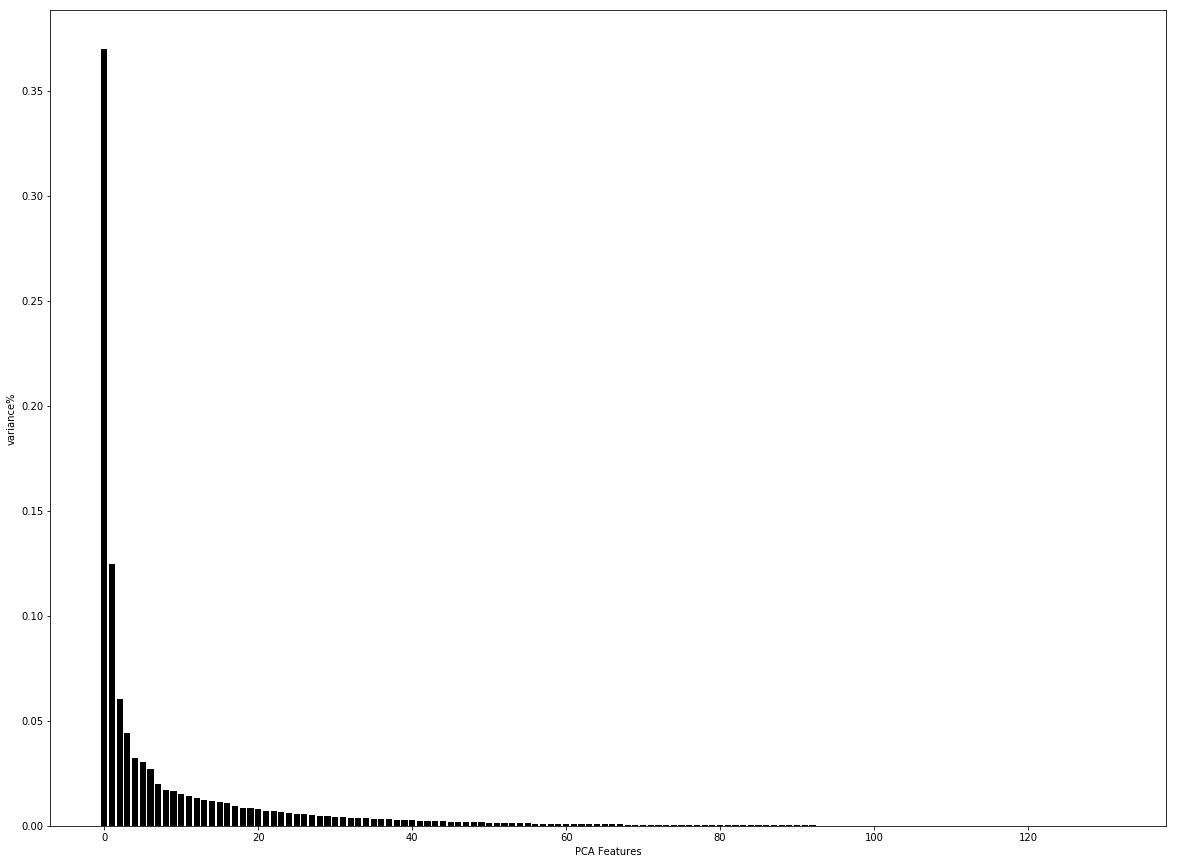

In [87]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.figure(figsize=(20,15))
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA Features')
plt.ylabel('variance%')
# plt.xticks(features)

# grafikte inceleme

grafiğe bakarak ilk 4 ve ya 5 component'i kullanmak mantıklı gözüküyor.

In [88]:
# ilk 4 component ile PCR

from sklearn.linear_model import LinearRegression

pca = PCA(n_components = 4)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()


In [89]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [90]:
print("intercept = " + str(pcr_model.intercept_))
print("coef = " + str(pcr_model.coef_))

intercept = -3.2296559462430827
coef = [-0.25537859  0.45505831  1.0208162   1.13211071]


In [91]:
y_pred = pcr_model.predict(X_reduced_train)

In [92]:
y_pred[0:5]

array([-2.06133052, -4.39343489,  6.43458943,  0.07091744, -2.90991944])

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

np.sqrt(mean_squared_error(y_train, y_pred))

36.55796344417821

In [94]:
r2_score(y_train, y_pred)

0.01643612313743592

In [95]:
pca2 = PCA(n_components = 4)
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

36.4770022946349

In [96]:
r2_score(y_test, y_pred)

0.012166772351543065

# İstatistik olarak regresyon

In [129]:
slm = sm.OLS(y_train, X_reduced_train)

In [130]:
model = slm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     21.71
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           8.69e-18
Time:                        15:19:33   Log-Likelihood:                -26319.
No. Observations:                5241   AIC:                         5.265e+04
Df Residuals:                    5237   BIC:                         5.267e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2554      0.073     -3.518      0.000      -0.398      -0.113
x2             0.4551      0.125      3.637      0.000       0.210       0.700
x3             1.0208      0.180      5.679      0.000       0.668       1.373
x4             1.1321      0.210      5.383      0.000       0.720       1.544
==============================================================================
Omnibus:                       23.452   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.272
Skew:                           0.165   Prob(JB):                    2.26e-175
Kurtosis:                       1.109   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
model.summary().tables[1]

# p value küçük çıkmış demek ki H0 reddedilir ve bileşenlerim anlamlı.

,coef,std err,t,P>|t|,[0.025,0.975]
x1,-0.2554,0.073,-3.518,0.000,-0.398,-0.113
x2,0.4551,0.125,3.637,0.000,0.210,0.700
x3,1.0208,0.180,5.679,0.000,0.668,1.373
x4,1.1321,0.210,5.383,0.000,0.720,1.544


# İdeal bileşen sayısını bulmak

In [132]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:20], y_train) # 20 bileşeni al
y_pred1 = pcr_model.predict(X_reduced_test[:,0:20])
print(np.sqrt(mean_squared_error(y_test, y_pred1)))

36.47700117218994


In [133]:
from sklearn import model_selection

In [134]:
cv_10 = model_selection.KFold(n_splits = 20,
                              shuffle = True,
                              random_state = 1)

In [135]:
lm = LinearRegression()

In [136]:
RMSE = [] 

In [137]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

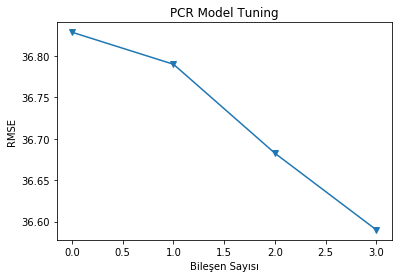

In [138]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

# grafiğe göre en ideal bileşen sayımız 3

In [139]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:3], y_train) # 3 bileşen al
y_pred = pcr_model.predict(X_reduced_train[:,0:3])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred1 = pcr_model.predict(X_reduced_test[:,0:3])
print(np.sqrt(mean_squared_error(y_test, y_pred1)))


36.65976038129313
36.69712271468335


In [ ]:
# 15 bileşen

In [98]:
pca = PCA(n_components = 15)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()

In [99]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pcr_model.predict(X_reduced_train)
np.sqrt(mean_squared_error(y_train, y_pred))

36.13318482554915

In [102]:
pca2 = PCA(n_components = 15)
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

36.94927154645588

In [104]:
r2_score(y_test, y_pred)

-0.013577849066863434